# Answers exercise black box modeling 2

## Question 1
As we all know life is not infinite and thus every living organism has a certain lifespan. Of course the same holds for microorganisms, although not many researchers realize this. During the cultivation of microorganisms they reach a certain age (chronological ageing) or they can only replicate a limited number of times (replicative ageing) where after they inevitably die. In addition to this, some cells can get killed because of too high mechanical forces in a stirred bioreactor.
We will now **extend our python black box chemostat model** to include cell death. This requires that we incorporate two balance equations for biomass, one for the living and one for the dead cells.

**a.)**	Write down the chemostat balances for live and dead biomass.<br>
> derive: 
* the ratio between dead and viable biomass for the steady state
* the specific growth rate during steady state
 



**Answer:**<br><br>
$ \dfrac {dC_{X,d}}{dt}=k_{d}\cdot C_{X,v}-D \cdot C_{X,d}$ <br><br>
$ \dfrac {dC_{X,v}}{dt}=\mu \cdot C_{X,v}-D\cdot C_{X,v} -k_{d} \cdot C_{X,v}$ <br><br>
Ratio between dead and viable biomassduring steady state:<br><br>
$ \dfrac {dC_{X,d}}{dt}=k_{d}\cdot C_{X,v}-D \cdot C_{X,d}=0 \; \Rightarrow \; \dfrac {C_{X,d}}{C_{X,v}}=\dfrac {k_{d}}{D}$ <br><br>
Specific growth rate during steady state:<br><br>
$ \dfrac {dC_{X,v}}{dt}=\mu \cdot C_{X,v}-D\cdot C_{X,v} -k_{d} \cdot C_{X,v}=0 \; \Rightarrow \; \mu = D+k_{d}$

**b.)**	Adapt the python chemostat model below to include cell death, assume hereby a specific death rate, **k<sub>d</sub>, of 0.02 Cmol/Cmol/h.**<br> 
Use this model to simulate a chemostat with dilution rate D = 0.1 h<sup>-1</sup>. Plot instead of the total biomass concentration Cx, the concentrations of viable and dead cells, resp. C<sub>x,v</sub> and C<sub>x,d</sub>.

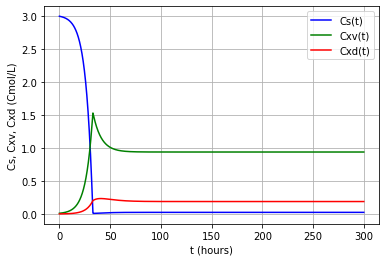

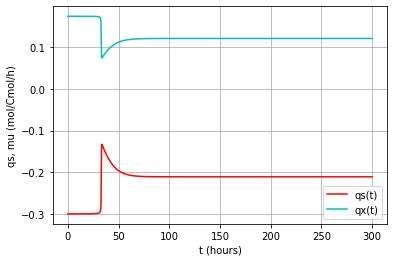

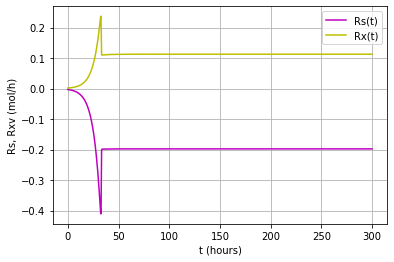

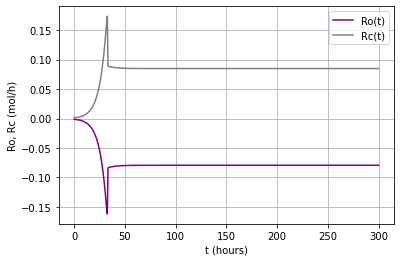

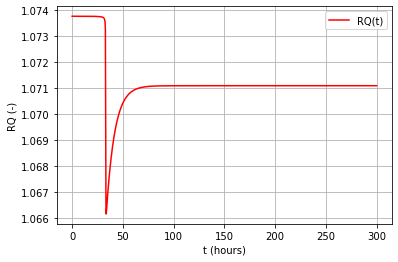

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# model parameters
qsmax = -0.3    # max spec glucose uptake rate (Cmol glucose/Cmol biomass/h)
Ks = 0.01       # glucose affinity constant (Cmol glucose/L)
a = -1.67       # Herbert-Pirt parameter (Cmol glucose/Cmol biomass)
ms = -0.01      # maintenance coefficient (Cmol glucose/Cmol biomass/h)
dilution = 0.1  # dilution rate of the chemostat (1/h)
Vl = 1          # liquid volume of the chemostat (L)
Csin = 2        # glucose concentration in the feed (Cmol/L)
tbatch = 33     # duration of the batch phase (hours)
time = 300      # total runtime simulation time (hours)
kd = 0.02       # specific death rate (Cmol/Cmol/h)


# model definition (balance equations for substrate and biomass)
# Cxv = concentration of viable cells, Cxd = concentration of dead cells
def mbal(y, t):
    Cs, Cxv, Cxd = y
    if t < tbatch:
        D = 0
    else:
        D = dilution
    qs = qsmax*Cs/(Ks+Cs)
    mu = (qs-ms)/a
    dCsdt = Cxv*qs+D*(Csin-Cs)
    dCxvdt = (mu-kd)*Cxv-D*Cxv
    dCxddt = kd*Cxv-D*Cxd
    return [dCsdt, dCxvdt, dCxddt]


# Integration
y0 = [3, 0.01, 0]
t = np.linspace(0, time, 1000)
sol = odeint(mbal, y0, t)

Cs = sol[:, 0]
Cxv = sol[:, 1]
Cxd = sol[:, 2]
qs = qsmax*Cs/(Ks+Cs)
mu = (qs-ms)/a
Rs = qs*Cxv*Vl
Rx = mu*Cxv*Vl
Rc = -(Rs+Rx)
Ro = (4*Rs+4.2*Rx)/4
RQ = Rc/-Ro

# plotting
plt.plot(t, Cs, 'b', label='Cs(t)')
plt.plot(t, Cxv, 'g', label='Cxv(t)')
plt.plot(t, Cxd, 'r', label='Cxd(t)')
plt.legend(loc='best')
plt.xlabel('t (hours)')
plt.ylabel('Cs, Cxv, Cxd (Cmol/L)')
plt.grid()
plt.savefig('Chem2_CsCxvCxd.jpg', dpi=500)
plt.show()

plt.plot(t, qs, 'r', label='qs(t)')
plt.plot(t, mu, 'c', label='qx(t)')
plt.legend(loc='best')
plt.xlabel('t (hours)')
plt.ylabel('qs, mu (Cmol/Cmol/h)')
plt.grid()
plt.savefig('Chem2_qsmu.jpg', dpi=500)
plt.show()

plt.plot(t, Rs, 'm', label='Rs(t)')
plt.plot(t, Rx, 'y', label='Rx(t)')
plt.legend(loc='best')
plt.xlabel('t (hours)')
plt.ylabel('Rs, Rxv (Cmol/h)')
plt.grid()
plt.savefig('Chem2_RsRxv.jpg', dpi=500)
plt.show()

plt.plot(t, Ro, 'purple', label='Ro(t)')
plt.plot(t, Rc, 'grey', label='Rc(t)')
plt.legend(loc='best')
plt.xlabel('t (hours)')
plt.ylabel('Ro, Rc (mol/h)')
plt.grid()
plt.savefig('Chem2_RoRcv.jpg', dpi=500)
plt.show()

plt.plot(t, RQ, 'red', label='RQ(t)')
plt.legend(loc='best')
plt.xlabel('t (hours)')
plt.ylabel('RQ (-)')
plt.grid()
plt.savefig('Chem2_RQ_v.jpg', dpi=500)

**c.)**	Compare the obtained simulation results with the ones obtained with the previous chemostat model (without cell death). Alternatively, you can carry out a simulation with your extended model where **k<sub>d</sub> = 0.** Explain the effect of cell death on:
- The duration of the batch phase.<br>

The steady state values of:
- The concentrations of (viable) biomass and residual glucose.
- The specific growth rate and specific glucose consumption rate.
- The total rates of biomass production (Rx) and glucose consumption (Rs) in Cmol/h
- The total rates of O2 consumption (Ro) and CO2 production (Rc) in mol/h
- The respiratory quotient (RQ = Rc/-Ro)


**Answer:**
* the batch phase takes longer because part of the cells die and don't reproduce
* the concentration of viable biomass is lower because viable cells continuously die
* the residual glucose concentration is higher because the growth rate and thus qs is higher
* **an important finding is that in case of cell death the growth rate is not equal to the dilution rate of the chemostat  anymore!**
* Rx is slightly higher due to the lower viable cell mass and therefore lower maintenance energy requirement
* Rs is slightly lower because Cs is a bit higher, so there is a bit more glucose in the effluent of the chemostat
* -Ro and Rc are both slightly lower due to the slightly higher value of Rx
* RQ is a bit higher because the specific growth rate is higher and thus less substrate electrons are transferred to oxygen

**d.)**	What is the effect of the dilution rate of the chemostat on these differences? What happens if the dilution rate is set equal to the death rate? Explain why.

**Answer:**<br>
* It all depends on the ratio of death rate and growth rate. Increasing the dilution rate, and thus the growth rate at constant k<sub>d</sub> will decrease the effects.
* It can be seen from the answer to question 1a above that if the dilution rate is equal to the death rate that during steady state: 1) the concentration of viable cells is equal to the concentration of dead cells and that the growth rate is two times the dilution rate.

## Question 2
Now we will construct a python model for the simulation of a **fed-batch culture**, as explained during the class of this morning (see lecture slides). The easiest way to do this is to modify the constructed chemostat model above.
This requires that you set up the balance equations for the total amounts of substrate and biomass and that an additional balance equation for the broth weight is incorporated (see lecture slides).<br>
Use a constant feed rate Fin = 0.005 kg/h with Cs,in = 16.67 Cmol/kg. Start with a broth weight of 1 kg. Also the fed-batch is started after a batch phase.<br>

**a.)**	Check whether you can reproduce the plots shown this morning.

**b.)**	Incorporate cell death in the fed-batch model as well and investigate what the effect is on the behavior of the fed-batch cultivation **(in the same way as above for the chemostat)**, thereby performing simulations with different values of kd. Thereby it should be realized that a kd of 0.02 is very high and that a value of 0.0005 would be more realistic. Conclusions?



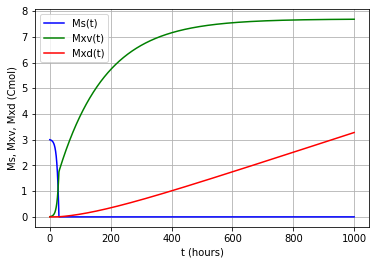

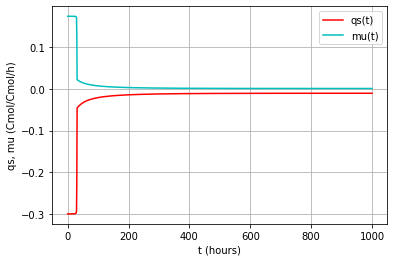

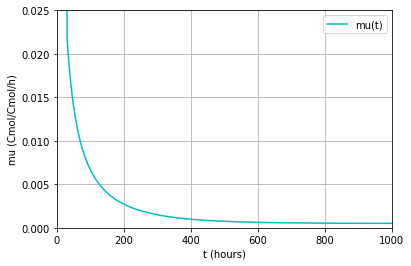

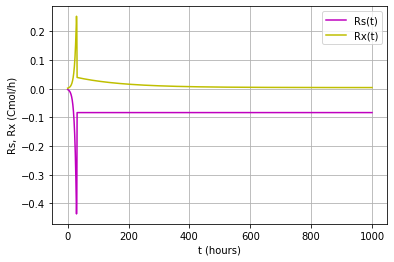

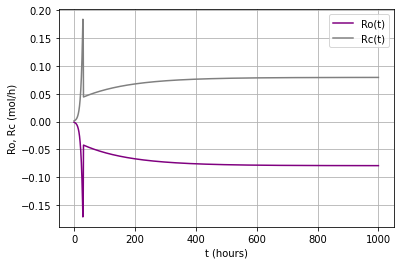

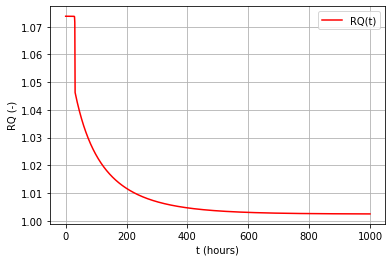

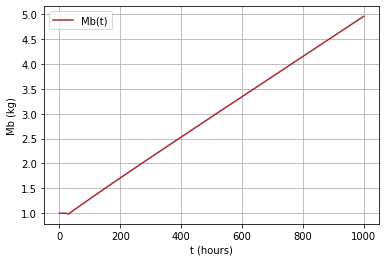

[0.00125947 0.00149693 0.00177916 0.0021146  0.00251327 0.0029871
 0.00355025 0.00421956 0.00501503 0.00596043 0.00708401 0.00841933
 0.01000627 0.01189222 0.01413344 0.0167968  0.01996168 0.02372233
 0.02819064 0.03349934 0.03980582 0.04729652 0.056192   0.06675251
 0.0792839  0.09414244 0.11173513 0.13250115 0.15680391 0.18409602
 0.16621833 0.04425608 0.04448365 0.04470981 0.04493454 0.04515786
 0.04537978 0.04560029 0.0458194  0.0460371  0.04625345 0.0464684
 0.04668201 0.04689423 0.0471051  0.04731474 0.04752287 0.04772956
 0.04793517 0.0481394  0.04834226 0.04854387 0.04874414 0.04894309
 0.04914085 0.04933731 0.0495324  0.04972648 0.0499191  0.05011031
 0.05030064 0.05048972 0.05067739 0.0508639  0.05104927 0.05123341
 0.05141635 0.05159813 0.05177874 0.05195814 0.05213642 0.05231375
 0.0524895  0.05266404 0.05283801 0.05301064 0.05318208 0.05335241
 0.05352161 0.05368985 0.05385698 0.05402298 0.05418786 0.0543518
 0.05451454 0.0546762  0.05483695 0.0549966  0.05515521 0.0553128

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# model parameters
qsmax = -0.3   # max specific glucose uptake rate (Cmol glucose/Cmol biomass/h)
Ks = 0.01      # glucose affinity constant (Cmol glucose/kg)
a = -1.67      # Herbert-Pirt parameter (Cmol glucose/Cmol biomass)
ms = -0.01     # maintenance coefficient (Cmol glucose/Cmol biomass/h)
kd = 0.0005    # specific death rate (Cmol/Cmol/h)
feed = 0.005   # feed rate of the fed-batch (kg/h)
Csin = 16.67   # glucose concentration in the feed (Cmol/kg)
tbatch = 29.5  # duration of the batch phase (hours)
time = 1000    # total runtime simulation time (hours)


# model definition (balance equations for substrate and biomass)
def mbal(y, t):
    Ms, Mxv, Mxd, Mb = y
    if t < tbatch:
        inflow = 0
    else:
        inflow = feed
    Cs = Ms/Mb
    qs = qsmax*Cs/(Ks+Cs)
    mu = (qs-ms)/a
    dMsdt = Mxv*qs+inflow*Csin
    dMxvdt = (mu-kd)*Mxv
    dMxddt = kd*Mxv
    Rc = -(qs*Mxv + mu*Mxv)
    Ro = (4*qs*Mxv + 4.2*mu*Mxv)/4
    dMbdt = inflow - 0.044*Rc - 0.032*Ro
    return [dMsdt, dMxvdt, dMxddt, dMbdt]


# Integration
y0 = [3, 0.01, 0, 1]
t = np.linspace(0, time, 1000)
sol = odeint(mbal, y0, t)

Ms = sol[:, 0]
Mxv = sol[:, 1]
Mxd = sol[:, 2]
Mb = sol[:, 3]
Cs = Ms/Mb
Cxv = Mxv/Mb
qs = qsmax*Cs/(Ks+Cs)
mu = (qs-ms)/a
Rs = qs*Mxv
Rx = mu*Mxv
Rc = -(Rs+Rx)
Ro = (4*Rs+4.2*Rx)/4
RQ = Rc/-Ro

# plotting
plt.plot(t, Ms, 'b', label='Ms(t)')
plt.plot(t, Mxv, 'g', label='Mxv(t)')
plt.plot(t, Mxd, 'r', label='Mxd(t)')
plt.legend(loc='best')
plt.xlabel('t (hours)')
plt.ylabel('Ms, Mxv, Mxd (Cmol)')
plt.grid()
plt.savefig('FB2_MsMx.jpg', dpi=500)
plt.show()

plt.plot(t, qs, 'r', label='qs(t)')
plt.plot(t, mu, 'c', label='mu(t)')
plt.legend(loc='best')
plt.xlabel('t (hours)')
plt.ylabel('qs, mu (Cmol/Cmol/h)')
plt.grid()
plt.savefig('FB2_qsqx.jpg', dpi=500)
plt.show()

plt.plot(t, mu, 'c', label='mu(t)')
plt.legend(loc='best')
plt.xlabel('t (hours)')
plt.ylabel('mu (Cmol/Cmol/h)')
plt.axis([0, 1000, 0, 0.025])
plt.grid()
plt.savefig('FB2_mu_zoom.jpg', dpi=500)
plt.show()

plt.plot(t, Rs, 'm', label='Rs(t)')
plt.plot(t, Rx, 'y', label='Rx(t)')
plt.legend(loc='best')
plt.xlabel('t (hours)')
plt.ylabel('Rs, Rx (Cmol/h)')
plt.grid()
plt.savefig('FB2_RsRx.jpg', dpi=500)
plt.show()

plt.plot(t, Ro, 'purple', label='Ro(t)')
plt.plot(t, Rc, 'grey', label='Rc(t)')
plt.legend(loc='best')
plt.xlabel('t (hours)')
plt.ylabel('Ro, Rc (mol/h)')
plt.grid()
plt.savefig('FB2_RoRc.jpg', dpi=500)
plt.show()

plt.plot(t, RQ, 'red', label='RQ(t)')
plt.legend(loc='best')
plt.xlabel('t (hours)')
plt.ylabel('RQ (-)')
plt.grid()
plt.savefig('FB2_RQ.jpg', dpi=500)
plt.show()

plt.plot(t, Mb, 'brown', label='Mb(t)')
plt.legend(loc='best')
plt.xlabel('t (hours)')
plt.ylabel('Mb (kg)')
plt.grid()
plt.savefig('FB2_Mb.jpg', dpi=500)
plt.show()

print(Rc)

**Answer:**<br>
Clearly, cell death has a great impact in fed batch cultivations because the dead cells accumulate.
A specific death rate of 0.02 in this simulation is very significant because of the low growth rate, and leads to a massive accumulation of dead cells. A more realistic death rate for yeast cells measured under optimal growth conditions is 0.0005 Cmol/Cmol/h. Carrying out the simulation with this death rate still results in a significant accumulation of dead cells.<br>
Specific implications for this fed-batch with a constant feed:<br>
* the specific growth rate does not decrease to zero but to the value of k<sub>d</sub>
* qs does not decrease to the values of the maintenance coefficient but to the value corresponding to a growth rate equal to k<sub>d</sub>
* Rs = -Fs so doesn't change
* Rx does not go to zero but to a constant value corresponding to a growth rate equal to k<sub>d</sub>
* If no cell death occurs the biomass will, after a long time of feeding, reach a constant value and all the substrate fed is catabolized for maintenance. This implies that Ro = 6Rs and Rc = -6Rs. In case of cell death the growth rate will not go to zero and a significant part of the substrate is used for biomass formation, resulting in significantly lower values of Rc and -Ro.
* Similarly the RQ will decrease to one in absence of cell death and to a value higher than one in case of cell death and thus growth.
* Please note that also the dynamics are different, in the presence of cell death a pseaudo steady state is reached faster.
